# pythia-level-threshold

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from utils import utils, stats
from importlib import reload

In [151]:
data_path = '/u/cmolder/GitHub/Pythia/out/pythia_level.csv'
weight_path = '/scratch/cluster/cmolder/traces/prefetcher_zoo/champsim/weights.txt'

# Add SPEC results.
df = utils.read_data_file(data_path)
weights = utils.read_weights_file(weight_path)
weights

,full_trace,weight,trace,simpoint
0,astar_163B,0.452174,astar,163B
1,astar_23B,0.162319,astar,23B
2,astar_313B,0.220290,astar,313B
3,bwaves_1609B,0.262524,bwaves,1609B
4,bwaves_1861B,0.337187,bwaves,1861B
...,...,...,...,...
184,streaming_phase1_core3,0.166667,streaming_core3,phase1
185,streaming_phase2_core3,0.166667,streaming_core3,phase2
186,streaming_phase3_core3,0.166667,streaming_core3,phase3
187,streaming_phase4_core3,0.166666,streaming_core3,phase4


In [152]:
pd.set_option('display.max_rows', 100)
df[(df.trace == 'astar') & (df.pythia_level_threshold == -5.0)]

,full_trace,trace,simpoint,l1d_pref,l2c_pref,llc_pref,l2c_pref_degree,llc_pref_degree,pythia_level_threshold,accuracy,...,pythia_high_conf_prefetches,mpki,mpki_reduction,dram_bw_epochs,dram_bw_reduction,ipc,ipc_improvement,baseline_prefetcher,path,baseline_path
4,astar_313B,astar,313B,no,pythia,no,"(None,)","(None,)",-5.0,34.250786,...,1436985,31.56909,44.196439,3437931,11.029693,0.11603,12.661423,"('no', 'no', 'no')",/scratch/cluster/cmolder/pythia_level/exp_spec...,/scratch/cluster/cmolder/pythia_level/exp_spec...
20,astar_163B,astar,163B,no,pythia,no,"(None,)","(None,)",-5.0,18.070911,...,242868,0.68424,15.702846,750541,0.753728,0.56183,0.827321,"('no', 'no', 'no')",/scratch/cluster/cmolder/pythia_level/exp_spec...,/scratch/cluster/cmolder/pythia_level/exp_spec...
39,astar_23B,astar,23B,no,pythia,no,"(None,)","(None,)",-5.0,68.319632,...,52227,1.12676,57.102773,1360282,7.697141,0.30258,8.783031,"('no', 'no', 'no')",/scratch/cluster/cmolder/pythia_level/exp_spec...,/scratch/cluster/cmolder/pythia_level/exp_spec...


In [153]:
weighted_df = stats.get_weighted_statistics(df, weights) # Weighted by simpoint

---
## Metrics of each static threshold
- How does each static threshold compare to regular Pythia, and no prefetcher?

In [157]:
def plot_threshold_metric(wdf, trace, metric, dpi=192):
    wdf = wdf[wdf.trace == trace]#[['pythia_level_threshold', metric]])
    wdf = wdf.sort_values('pythia_level_threshold')
    X, y = wdf.pythia_level_threshold.to_numpy(), wdf[metric].to_numpy()
    
    
    fig, ax = plt.subplots(dpi=dpi)
    
    
    ax.plot(np.arange(0, len(y)), y)
    
    ax.set_xticks(np.arange(0, len(y)))
    ax.set_xticklabels(['Regular' if x == float('-inf') else str(x) for x in X], rotation=45)
    ax.set_xlabel('Static level threshold')
    ax.set_ylabel(metric)
    #ax.set_ylim(ymin=0)
    
    plt.axhline(y=y[0], linewidth=0.75, ls='--', color='red') # Regular Pythia baseline
    #plt.axhline(y=0, linewidth=0.75, ls='--', color='black')  # No prefetcher baseline
    
    fig.suptitle(f'{trace} {metric}')
    plt.show()

## IPC improvement

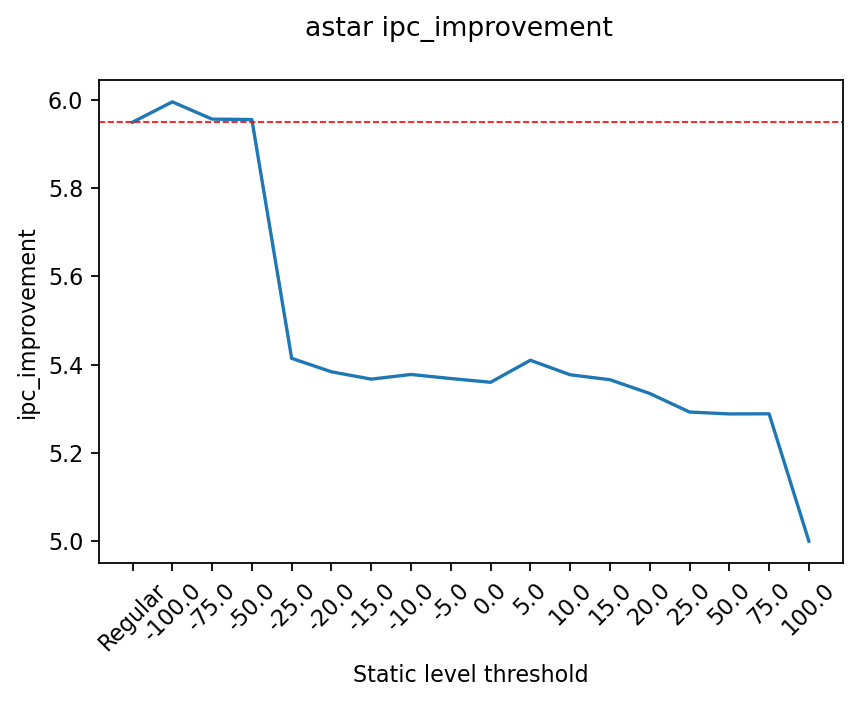

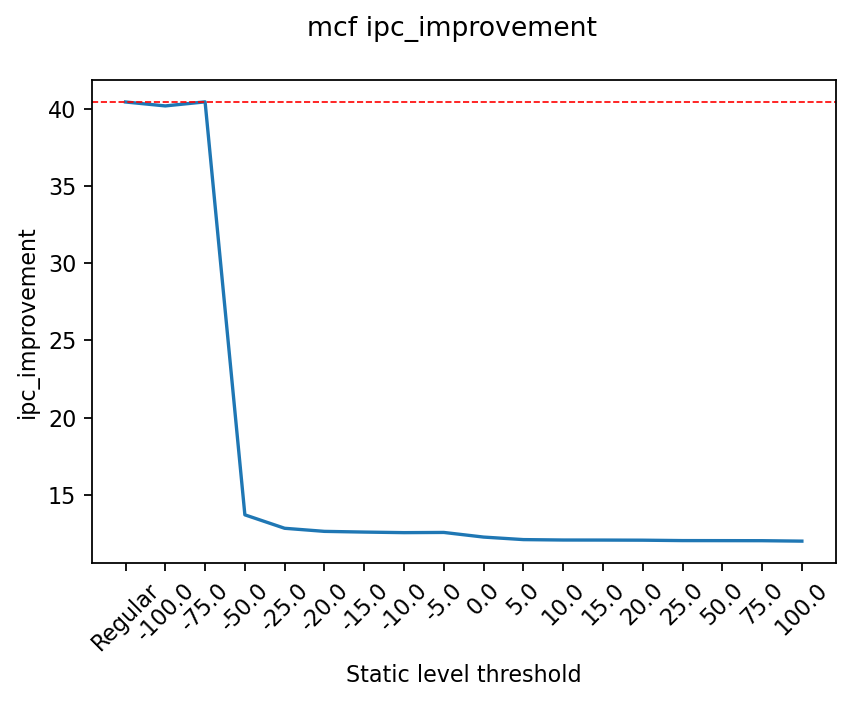

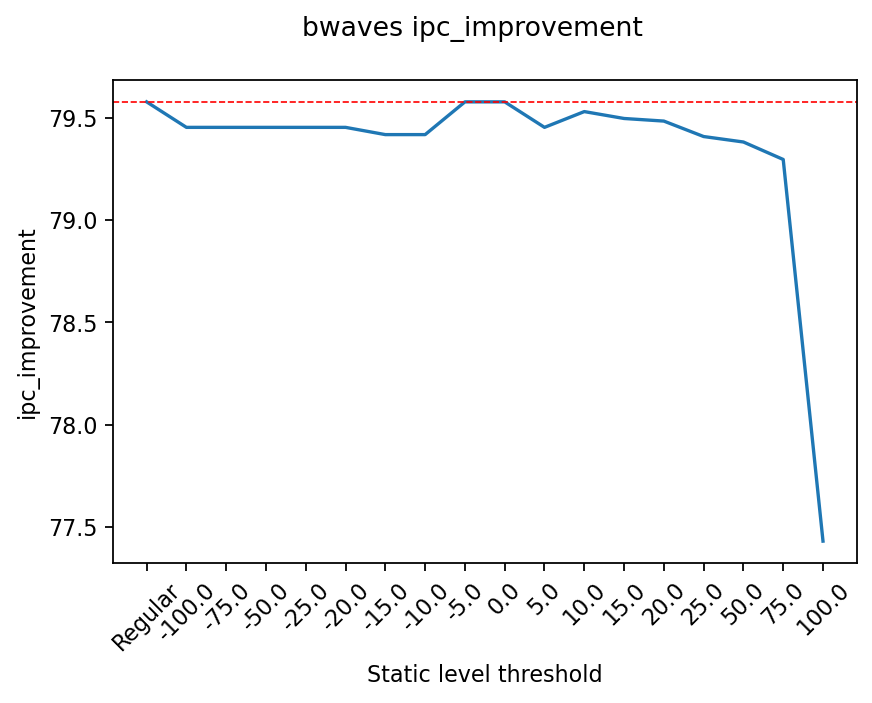

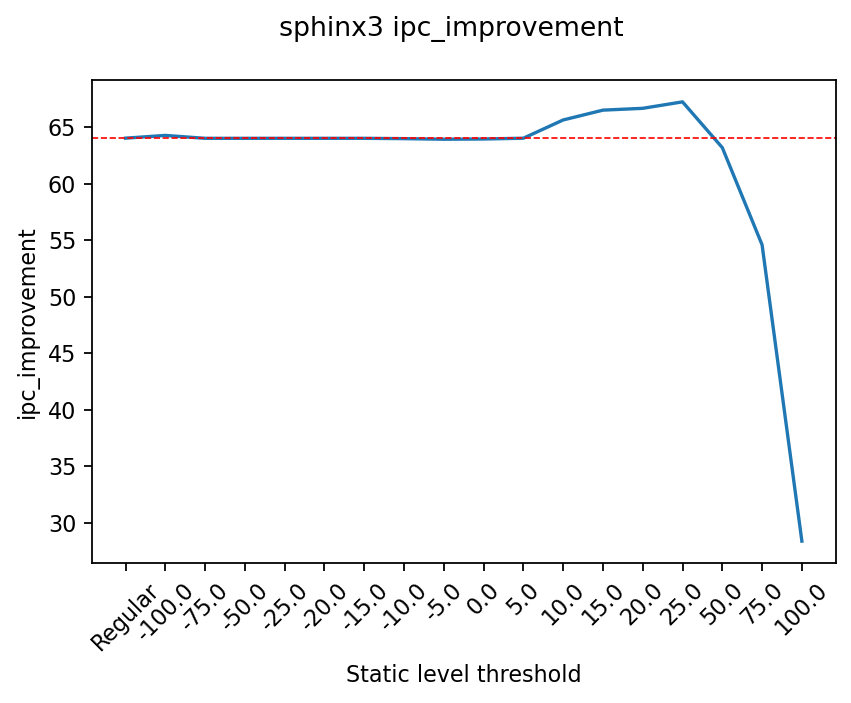

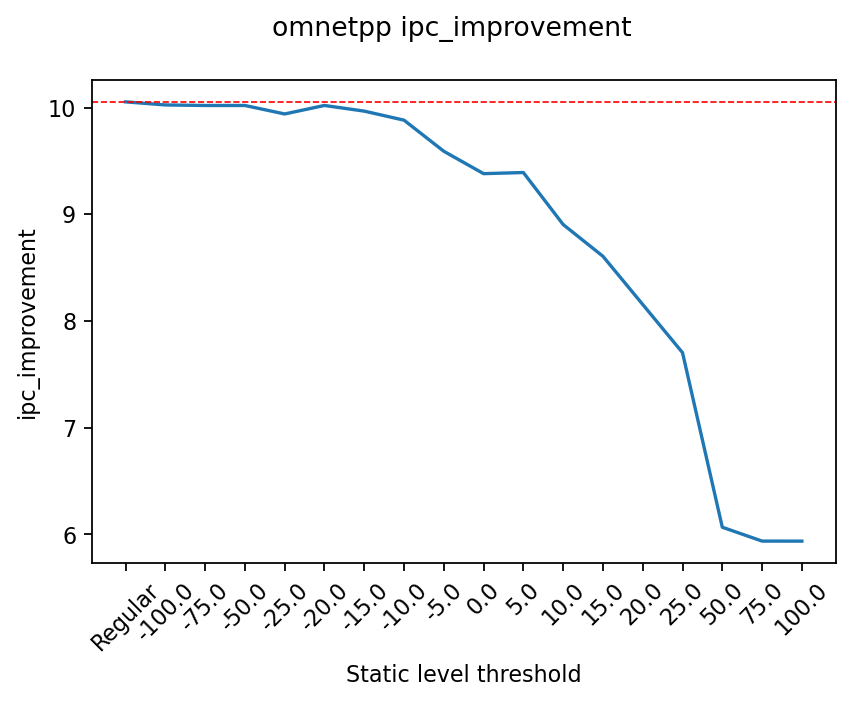

In [158]:
for tr in weighted_df.trace.unique():
    plot_threshold_metric(weighted_df, tr, 'ipc_improvement', dpi=160)

## LLC MPKI reduction

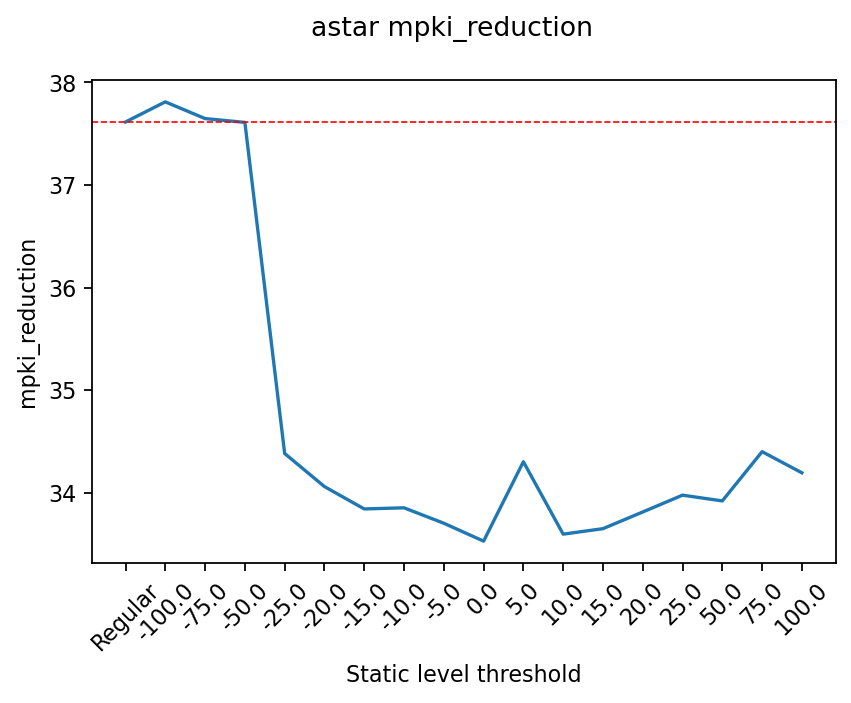

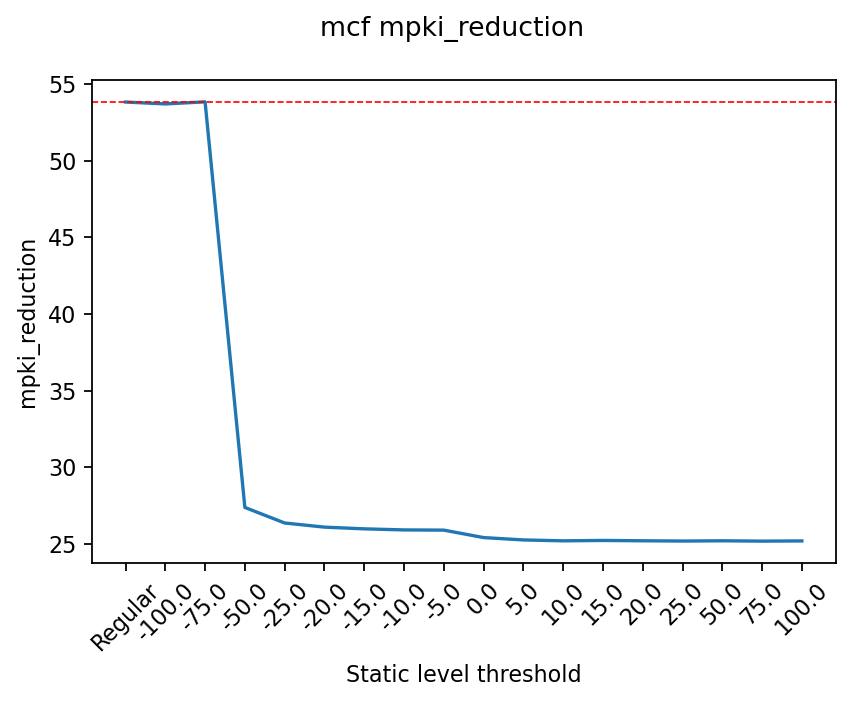

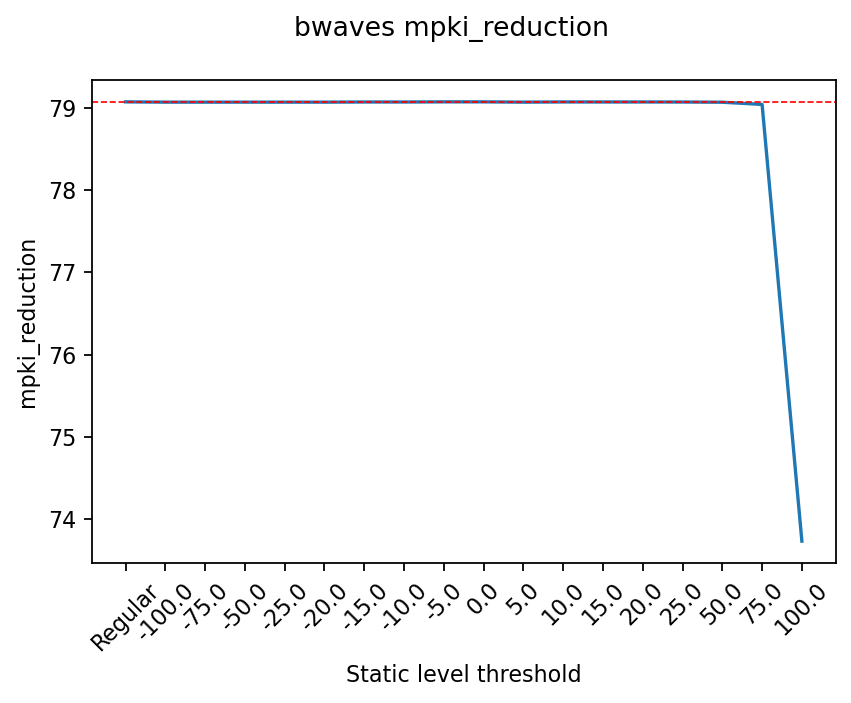

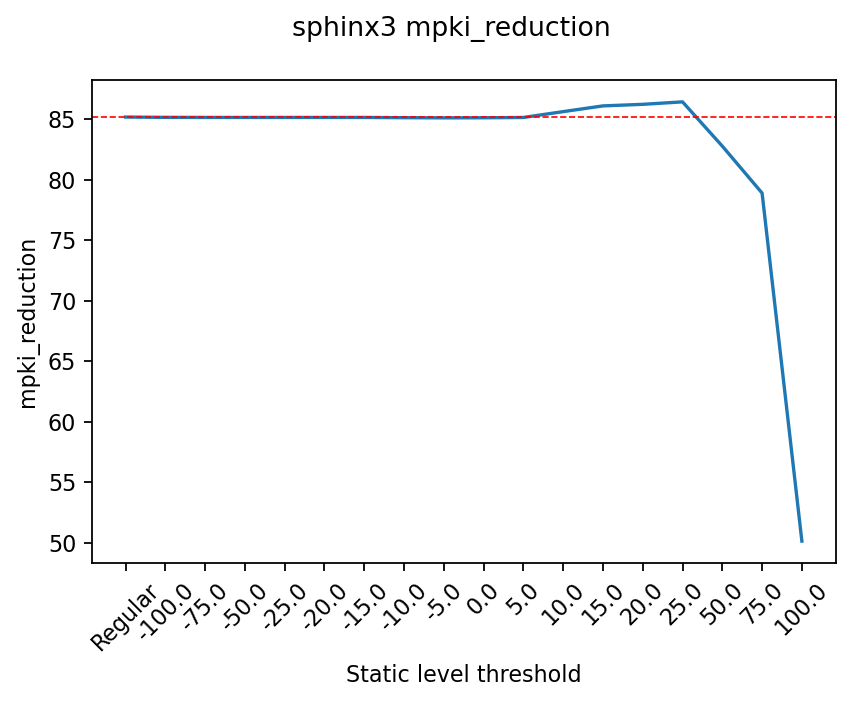

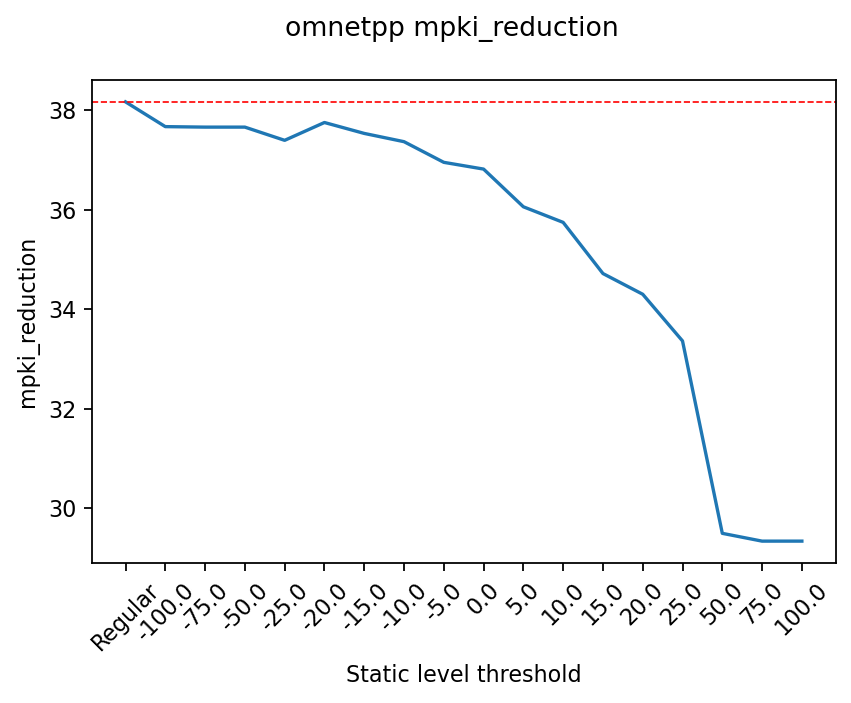

In [159]:
for tr in weighted_df.trace.unique():
    plot_threshold_metric(weighted_df, tr, 'mpki_reduction', dpi=160)